In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Quantiles
We all know the regular way of looking at quantiles: The $q^{th}$ quantile of a set of observations is the value below which a certain fraction $q$ of the data falls when the observations are ordered in ascending order. But there is another lens through which we can see quantiles. Quantiles are values that divide a probability distribution into intervals with equal probabilities. They essentially help in understanding the distribution of data by dividing it into specified intervals. The 25th percentile or 0.25 quantile means that 25% of the data lies below this value. This interpretation translates to a relationship with the Cumulative Distribution Function (CDF)

The CDF of a random variable $X$, denoted as $\mathcal{F}(x)$, gives the probability that $X$ will take a value less than or equal to $x$. Mathematically, it's defined as:
$$\mathcal{F}(x)= P(X≤x)$$
Quantiles can be seen as the inverse function of the CDF. If the CDF maps a real valued $x$ to a probability $[0,1]$, the quantile does the exact opposite. It takes a probability, $p$, and maps it back to a real valued $x$. This means that the $0.9^{th}$ quantile of a data distribution can be found by finding the real valued $x$ which makes $P(X≤x)=0.9$.
To get the CDF, ideally, we would need to know the real probability distribution. But, as you know, we can calculate quantiles even for data for which we do not know the distribution. This is done by using something called an **Empirical Cumulative Distribution Function (ECDF)**. Let’s understand this with an example. We have a dataset of 7 points: 



In [2]:
# Data
data = np.array([1, 1.9, 2.2, 3, 3.7, 4.1, 5])

Now we sort the data in ascending order (by divine chance, this is already sorted!), and calculate the ECDF. 

The ECDF is a step function that increases by $\frac{1}{n}$, where $n$ is the number of data points. This is done so that at the end of the dataset, we reach probability of 1. Mathematically, if you have $n$ points, the ECDF at any point $x_i$ is:

$$\mathcal{F}(x_i )=\frac{\text{\# of datapoints}≤x_i)}{n}$$

Plot below shows how we can construct an ECDF on the data and also how we can calculate quantiles using the ECDF. If we want to find the $0.4^{th}$ quantile, we find _0.4_ on the y-axis, drop a line to the ECDF and follow it to the x-axis. The point where it lands on the x-axis is the quantile value.

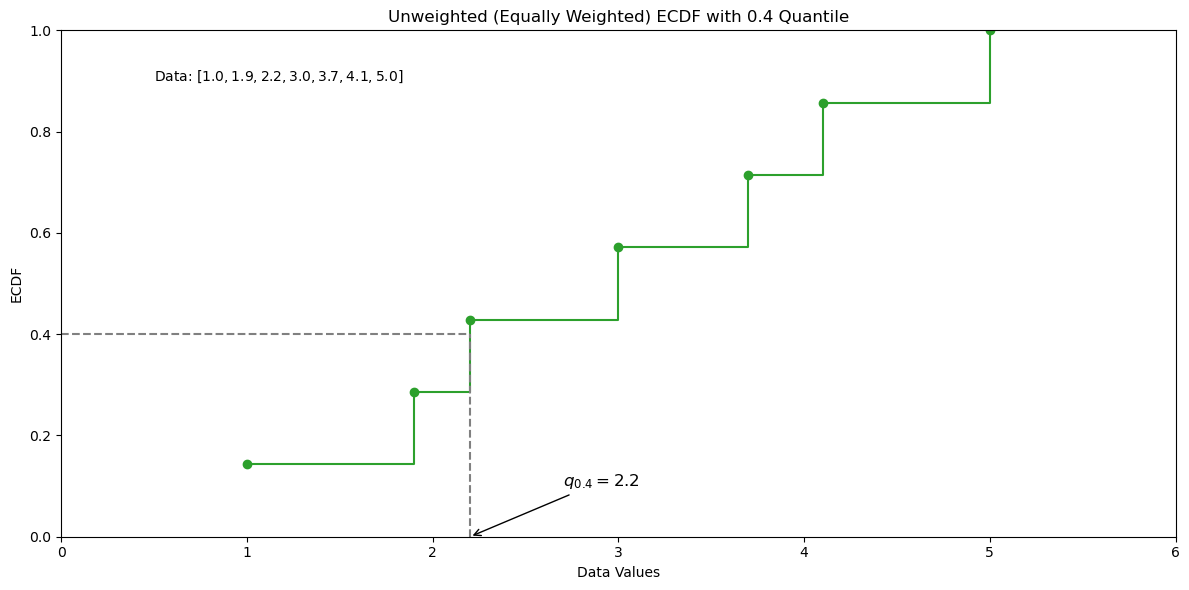

In [3]:
quantile = 0.4
# Sorting data for ECDF
sorted_data = np.sort(data)
n = len(data)
unweighted_cdf = np.arange(1, n+1) / n

# Plotting Unweighted ECDF with drop lines from the curve to the axes
plt.figure(figsize=(12, 6))

# Unweighted ECDF
# plt.subplot(1, 2, 1)
plt.step(sorted_data, unweighted_cdf, where="post", label="Unweighted ECDF", color='tab:green')
plt.scatter(sorted_data, unweighted_cdf, color='tab:green')
plt.vlines(x=sorted_data[np.searchsorted(unweighted_cdf, quantile)], ymin=0, ymax=quantile, color='gray', linestyle='--', linewidth=1.5)
plt.hlines(y=quantile, xmin=0, xmax=sorted_data[np.searchsorted(unweighted_cdf, quantile)], color='gray', linestyle='--', linewidth=1.5)
annot_unweighted = r'$q_{'+str(quantile)+'} = '+str(sorted_data[np.searchsorted(unweighted_cdf, quantile)])+'$'
plt.annotate(annot_unweighted, 
             xy=(sorted_data[np.searchsorted(unweighted_cdf, quantile)], 0), 
             xytext=(sorted_data[np.searchsorted(unweighted_cdf, quantile)]+0.5, 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.text(0.5, 0.9, 'Data: $['+",".join(data.astype(str).tolist())+']$', fontsize = 10)
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.xlabel('Data Values')
plt.ylabel('ECDF')
plt.title(f'Unweighted (Equally Weighted) ECDF with {quantile} Quantile')
plt.grid(False)

plt.tight_layout()
plt.show()

#### Fun Fact
CDF or the ECDF is a function that maps from $\mathbb{R}→[0,1]$. On the chart, it goes from x-axis to y-axis. And quantile is the inverse function which goes from $[0,1]→\mathbb{R}$, and on the chart it goes from y-axis to x-axis.

## Weighted Quantiles
With this intuition, let’s look at weighted quantiles. Just like the unweighted, or equally weighted ECDF, the weighted ECDF also moves from 0 to 1 on the y-axis, but instead of going up by equal intervals of $]frac{1}{n}$, they go up according to the assigned weights. It is still a step function, but the step sizes aren’t uniform, but are equal to the corresponding weights.

Let's consider weights as below:

In [4]:
weights = np.array([0.05, 0.05, 0.1 , 0.15, 0.15, 0.25, 0.25])

We can construct the weighted ECDF for this just like the ECDF for the equally weighted case and calculate the $0.4^{th}$ quantile by dropping lines to the axes.

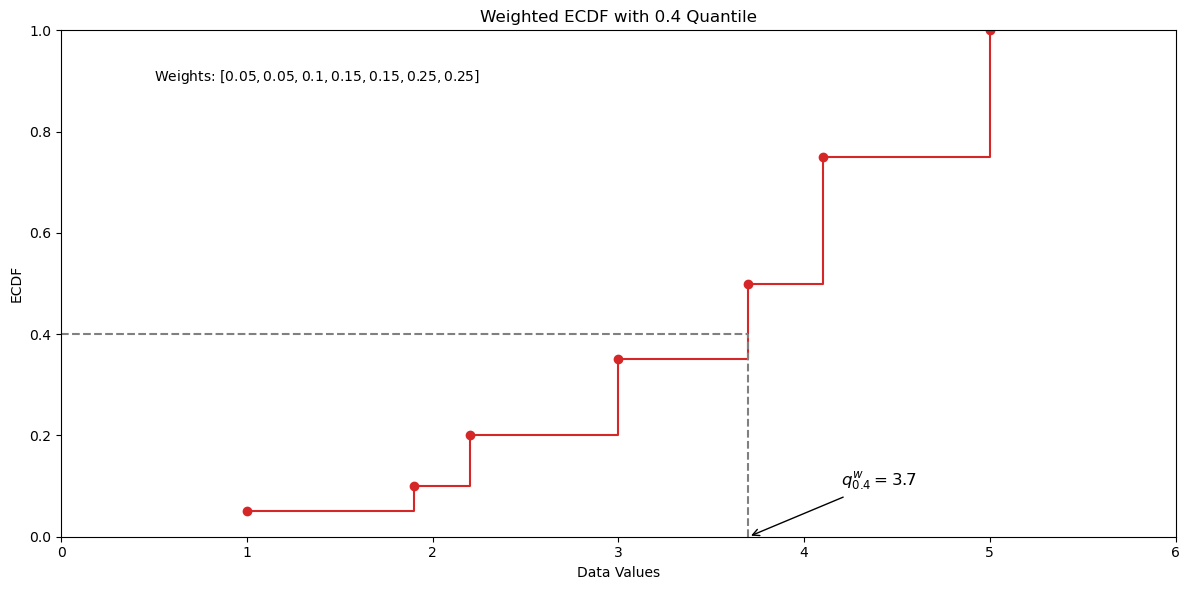

In [5]:
# Weighted CDF
sorted_indices = np.argsort(data)
sorted_weights = weights[sorted_indices]
weighted_cdf = np.cumsum(sorted_weights)

# Plotting Weighted ECDF with drop lines from the curve to the axes
plt.figure(figsize=(12, 6))

plt.step(sorted_data, weighted_cdf, where="post", label="Weighted ECDF", color='tab:red')
plt.scatter(sorted_data, weighted_cdf, color='tab:red')
plt.vlines(x=sorted_data[np.searchsorted(weighted_cdf, quantile)], ymin=0, ymax=quantile, color='gray', linestyle='--', linewidth=1.5)
plt.hlines(y=quantile, xmin=0, xmax=sorted_data[np.searchsorted(weighted_cdf, quantile)], color='gray', linestyle='--', linewidth=1.5)
annot_weighted = r'$q^w_{'+str(quantile)+'} = '+str(sorted_data[np.searchsorted(weighted_cdf, quantile)])+'$'
plt.annotate(annot_weighted, 
             xy=(sorted_data[np.searchsorted(weighted_cdf, quantile)], 0), 
             xytext=(sorted_data[np.searchsorted(weighted_cdf, quantile)]+0.5, 0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12)
plt.text(0.5, 0.9, 'Weights: $['+",".join(weights.astype(str).tolist())+']$', fontsize = 10)
plt.xlim(0, 6)
plt.ylim(0, 1)
plt.xlabel('Data Values')
plt.ylabel('ECDF')
plt.title(f'Weighted ECDF with {quantile} Quantile')
plt.grid(False)

plt.tight_layout()
plt.show()

More concretely, given a dataset, ${x_1,…,x_n }$ with corresponding normalized weights ${w_1,…,w_n }$ the weighted quantile $q_w^p$ is defined as the value $x_k$ such that:
$$\sum_{i=1}^{k}w_i ≤p \text{ and } \sum_{i=1}^{k+1}w_i >p$$
where, $k$ is the index of the required quantile and $x_k$ is the corresponding value from the data.

This can also be writted more formally as:

$$
\hat{q}_w^p = \inf \left\{ q : \sum_{i=1}^{n} w_i \mathbb{I}\{x_i < q\} \geq p \right\}
$$
where:
- $ \hat{q}_w^p $ is the weighted quantile at level $p$.
- The sum $ \sum_{i=1}^{n} w_i \mathbb{I}\{x_i < q\} $ represents the cumulative weight of all data points $ x_i $ that are less than $ q $.
- The quantile $ \hat{q}_w^p $ is defined as the smallest value $ q $ such that this cumulative weight is at least $ p $. This matches the concept from the original weighted quantile definition.

This formula finds the value $ \hat{q}_w^p $ that corresponds to the weighted quantile where the cumulative weight of the dataset is equal to or exceeds the desired threshold $ p $.

Let's define regular quantile and weighted quantile as functions in python for clarity


In [7]:
import numpy as np
def regular_quantile(values, quantile):
    """
    Compute the regular quantile of a given dataset using the CDF approach.

    Parameters:
    values (array-like): The data points.
    quantile (float): The desired quantile (between 0 and 1).

    Returns:
    float: The regular quantile.
    """
    # Ensure the inputs are numpy arrays
    values = np.array(values)

    # Sort the data
    sorted_values = np.sort(values)

    # Compute the cumulative distribution function (CDF)
    n = len(sorted_values)
    cdf = np.arange(1, n + 1) / n

    # Find the quantile
    quantile_index = np.searchsorted(cdf, quantile)

    return sorted_values[quantile_index]

def weighted_quantile(values, weights, quantile):
    """
    Compute the weighted quantile of a given dataset with early weight normalization.

    Parameters:
    values (array-like): The data points.
    weights (array-like): The weights associated with the data points.
    quantile (float): The desired quantile (between 0 and 1).

    Returns:
    float: The weighted quantile.
    """
    # Ensure the inputs are numpy arrays
    values = np.array(values)
    weights = np.array(weights)

    # Normalize the weights so they sum to 1
    weights = weights / np.sum(weights)

    # Sort the data and weights by the data values
    sorted_indices = np.argsort(values)
    sorted_values = values[sorted_indices]
    sorted_weights = weights[sorted_indices]

    # Compute the cumulative sum of the normalized weights
    cumulative_weights = np.cumsum(sorted_weights)

    # Find the quantile
    quantile_index = np.searchsorted(cumulative_weights, quantile)

    return sorted_values[quantile_index]

# Example Usage and Verification
quantile_value = regular_quantile(data, quantile)
weighted_quantile_value = weighted_quantile(data, weights, quantile)
print(f"The {quantile}th quantile is {quantile_value}")
print(f"The weighted {quantile}th quantile is {weighted_quantile_value}")

The 0.4th quantile is 2.2
The weighted 0.4th quantile is 3.7


This regular quantile and quantile implementations in popular libraries like numpy may slghtly differ because of the way they handle the edge cases and also interpolate between values in the dataset.